In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [188]:
train_df=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_df=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [189]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [190]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [191]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [192]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [193]:
train_df.duplicated().sum()

0

In [194]:
test_df.duplicated().sum()

0

In [195]:
import plotly.express as px

px.pie(values=train_df['is_fraud'].value_counts(),names=["Genuine","Fraud"],title="Fraud vs Genuine transactions")

In [196]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [197]:
train_df.head(10)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0
5,2019-01-01 00:04:08,gas_transport,94.63,F,Dublin,PA,40.3750,-75.2045,2158,Transport planner,1961-06-19,40.653382,-76.152667,0
6,2019-01-01 00:04:42,grocery_net,44.54,F,Holcomb,KS,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,37.162705,-100.153370,0
7,2019-01-01 00:05:08,gas_transport,71.65,M,Edinburg,VA,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,38.948089,-78.540296,0
8,2019-01-01 00:05:18,misc_pos,4.27,F,Manor,PA,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,40.351813,-79.958146,0
9,2019-01-01 00:06:01,grocery_pos,198.39,F,Clarksville,TN,36.5220,-87.3490,151785,Pathologist,1974-03-28,37.179198,-87.485381,0


In [198]:
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date']=train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_df['trans_date']=pd.to_datetime(train_df['trans_date'])
train_df['dob']=pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date']=test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_df['trans_date']=pd.to_datetime(test_df['trans_date'])
test_df['dob']=pd.to_datetime(test_df['dob'])

In [199]:

train_df['age']=train_df['trans_date']-train_df['dob']
train_df['age']=train_df['age']/pd.Timedelta('365 days')

test_df["age"] = test_df["trans_date"]-test_df["dob"]
test_df['age']=test_df['age']/pd.Timedelta('365 days')


In [200]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['gender']= label_encoder.fit_transform(train_df['gender'])
train_df['state']= label_encoder.fit_transform(train_df['state'])
train_df['city']= label_encoder.fit_transform(train_df['city'])
train_df['job']= label_encoder.fit_transform(train_df['job'])

test_df['gender']= label_encoder.fit_transform(test_df['gender'])
test_df['state']= label_encoder.fit_transform(test_df['state'])
test_df['city']= label_encoder.fit_transform(test_df['city'])
test_df['job']= label_encoder.fit_transform(test_df['job'])



In [201]:
train_df = pd.get_dummies(train_df, columns=['category'], prefix='category',dtype= int)
test_df = pd.get_dummies(test_df, columns=['category'], prefix='category',dtype= int)

test_df = test_df.reindex(columns=train_df.columns, fill_value=0)


Split The Data

In [202]:
x_train=train_df.drop(columns=['trans_date_trans_time','dob','trans_date','is_fraud'])
y_train=train_df['is_fraud']
x_test=test_df.drop(columns=['trans_date_trans_time','dob','trans_date','is_fraud'])
y_test=test_df['is_fraud']

Logistic Regression

Model Score on Training data 0.993650683478898
Model Score on Testing data 0.9955211176871764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    555375
           1       0.00      0.00      0.00       344

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      1.00      1.00    555719



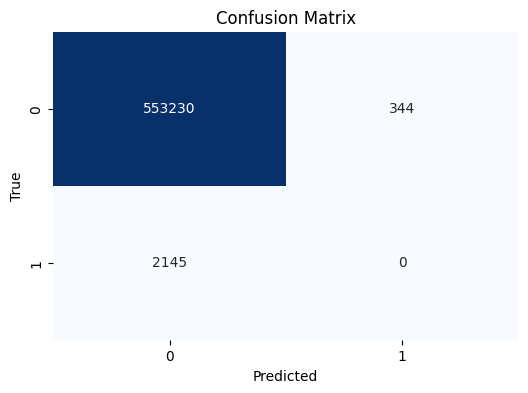

In [203]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train ,y_train)
print("Model Score on Training data",lr.score(x_train ,y_train))
print("Model Score on Testing data",lr.score(x_test ,y_test))
y_pred = lr.predict(x_test)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

DecisonTreeClasifier

Model Score on Training data 1.0
Model Score on Testing data 0.9965702090444991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553370
           1       0.60      0.55      0.58      2349

    accuracy                           1.00    555719
   macro avg       0.80      0.77      0.79    555719
weighted avg       1.00      1.00      1.00    555719



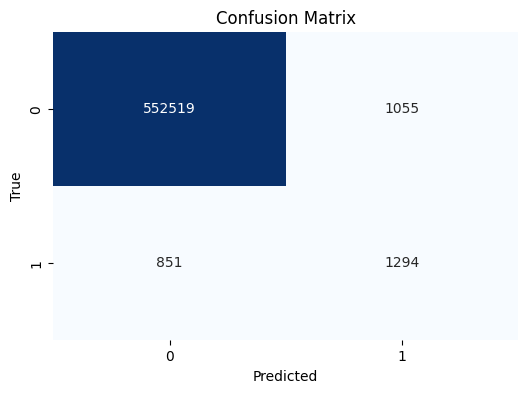

In [210]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train ,y_train)
print("Model Score on Training data",dt.score(x_train ,y_train))
print("Model Score on Testing data",dt.score(x_test ,y_test))
y_pred = dt.predict(x_test)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()